In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
os.getcwd()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

IndentationError: unexpected indent (<ipython-input-123-71b50832f154>, line 8)

In [2]:
#LIBRARIES USED IN THE NOTEBOOK

In [3]:

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")

In [5]:
#EXPLORING THE DATASET

In [6]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [7]:
data.shape

(145460, 23)

<AxesSubplot:>

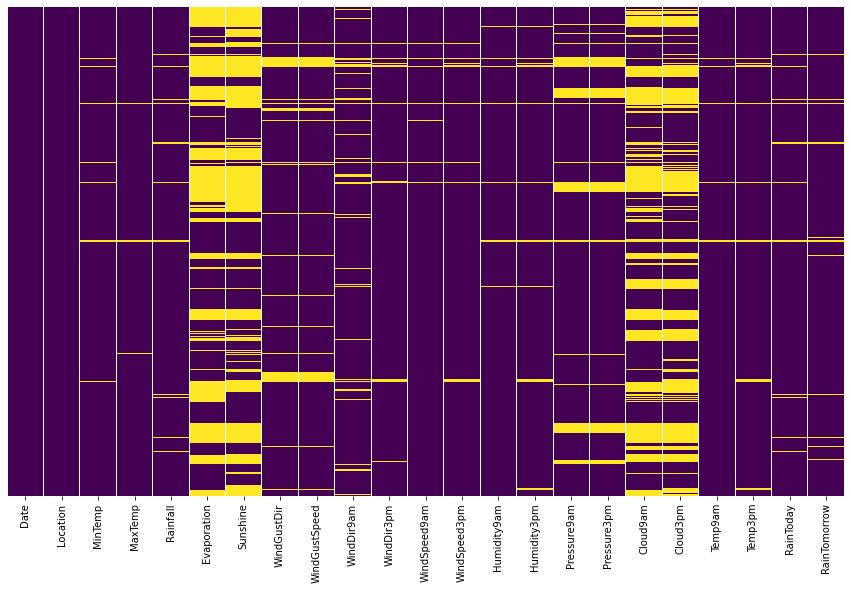

In [8]:
plt.figure(figsize=(15,9))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [10]:
data.isnull().sum()/len(data)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [11]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [12]:
#VISUALISATION USING SEABORN 

<AxesSubplot:ylabel='Density'>

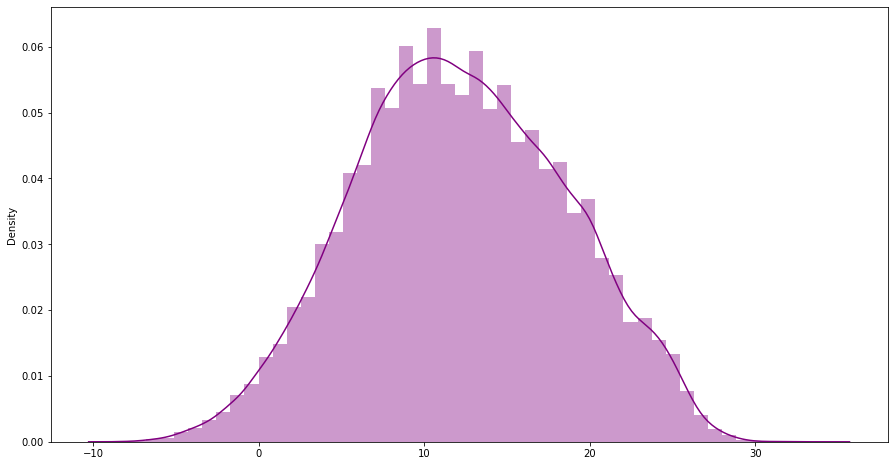

In [13]:
plt.figure(figsize=(15,8))
sns.distplot(x=data["MinTemp"],color="purple")

In [14]:
data["MinTemp"]=data["MinTemp"].fillna(value=12.000000)

<AxesSubplot:ylabel='Density'>

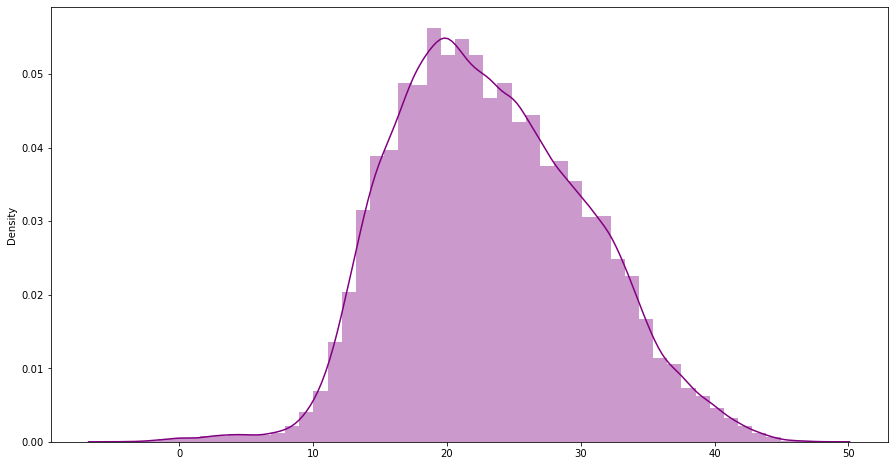

In [15]:
plt.figure(figsize=(15,8))
sns.distplot(x=data["MaxTemp"],color="purple")

In [16]:
data["MaxTemp"]=data["MaxTemp"].fillna(value=22.6)

In [17]:
data["MaxTemp"].isnull().sum()

0

<AxesSubplot:ylabel='Density'>

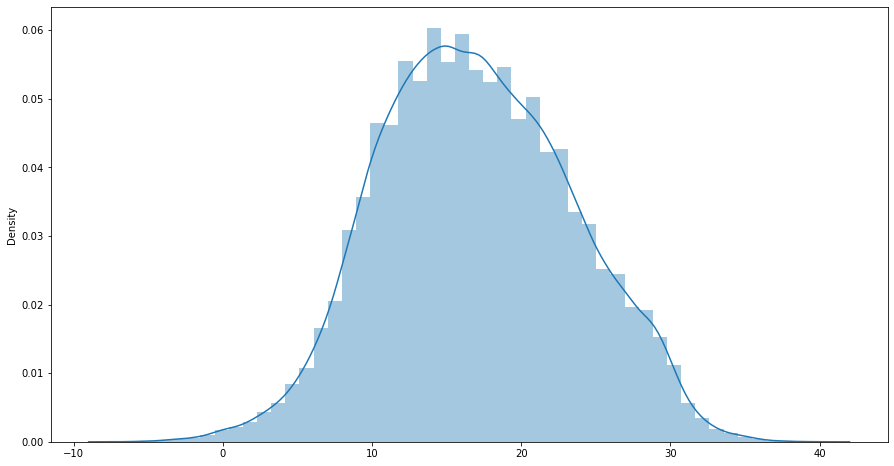

In [18]:
plt.figure(figsize=(15,8))
sns.distplot(x=data["Temp9am"])

In [19]:
data["Temp9am"]=data["Temp9am"].fillna(value=16.700000)
                                       


In [20]:
data["Temp3pm"]=data["Temp3pm"].fillna(value=21.10000)

<AxesSubplot:xlabel='RainToday', ylabel='count'>

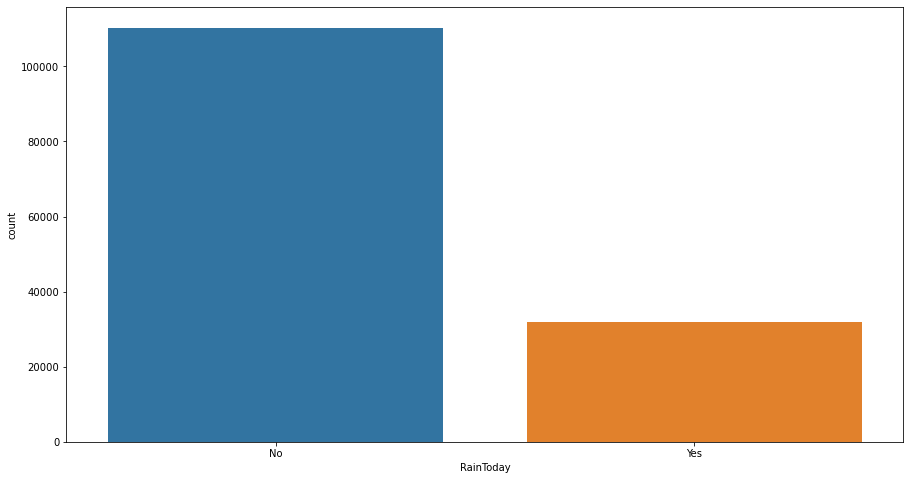

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(data["RainToday"])

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

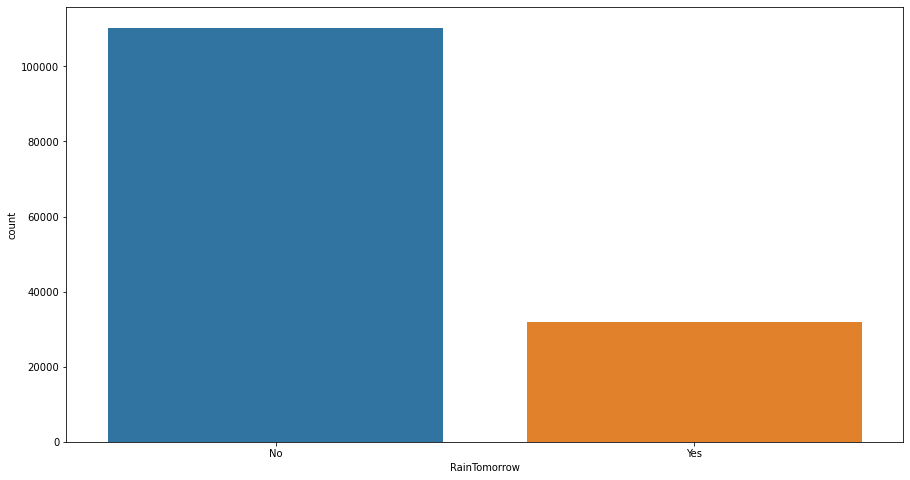

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(data["RainTomorrow"])

In [23]:
data["RainTomorrow"]=data["RainTomorrow"].fillna("No")

In [24]:
data["RainToday"]=data["RainToday"].fillna("No")

In [25]:
data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [26]:
data["Cloud9am"].nunique()

10

<AxesSubplot:xlabel='Cloud9am', ylabel='count'>

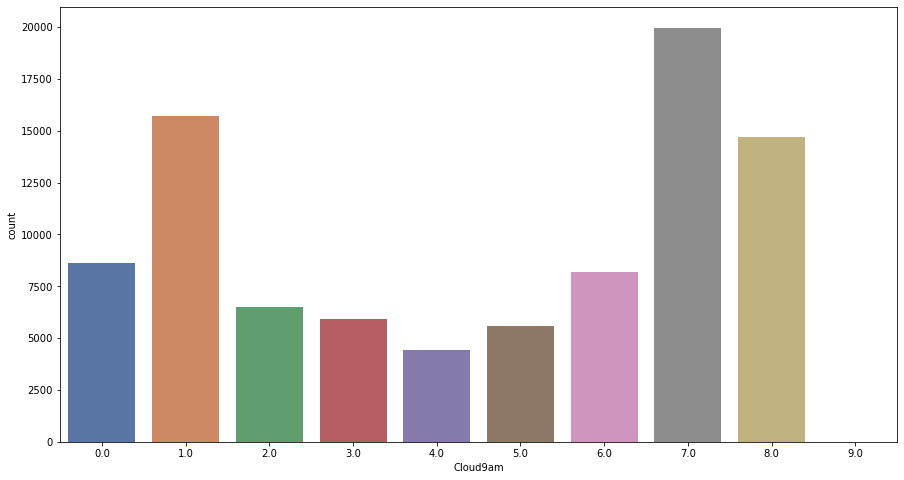

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(data["Cloud9am"],palette="deep")

<AxesSubplot:xlabel='Cloud3pm', ylabel='count'>

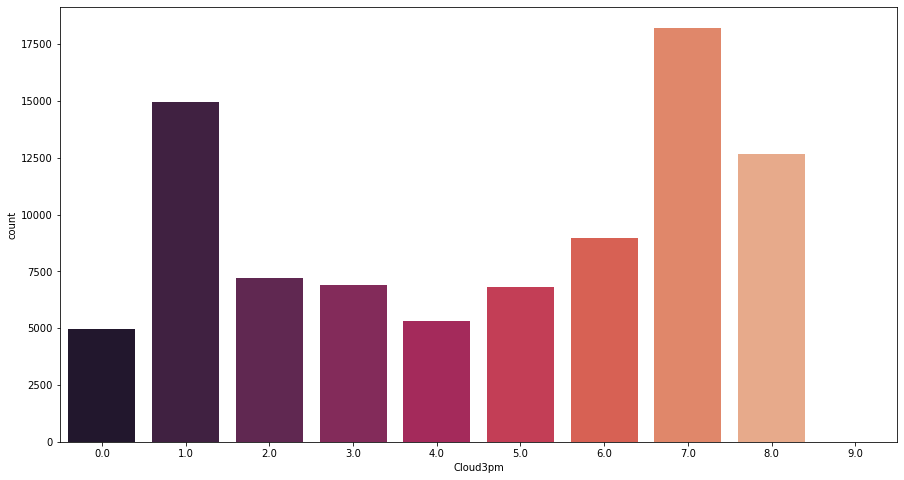

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(data["Cloud3pm"],palette="rocket")

In [29]:
data["Cloud3pm"]=data["Cloud3pm"].fillna(5.0)
data["Cloud9am"]=data["Cloud9am"].fillna(5.0)

In [30]:
data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [31]:
data["WindSpeed9am"].nunique()

43

<AxesSubplot:xlabel='WindSpeed9am', ylabel='count'>

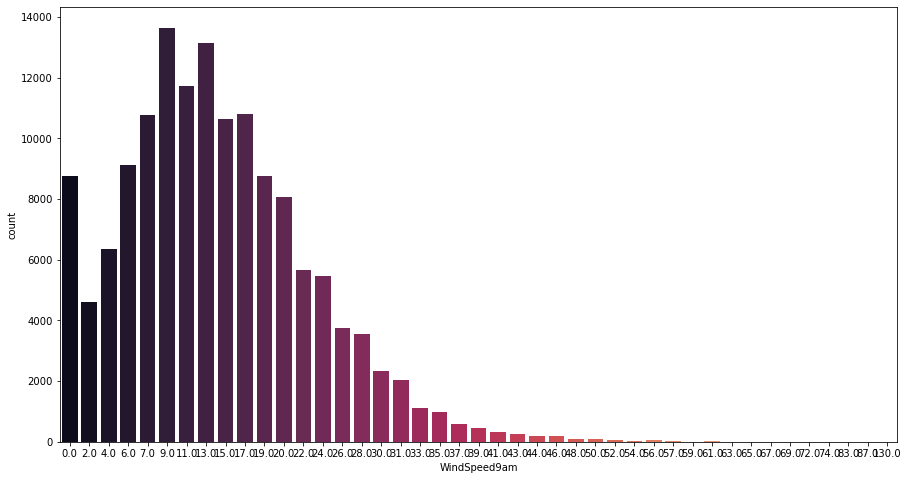

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(data["WindSpeed9am"],palette="rocket")

In [33]:
data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [34]:
data["WindSpeed9am"]=data["WindSpeed9am"].fillna(value=13.000000)

In [35]:
data["WindSpeed3pm"]=data["WindSpeed3pm"].fillna(value=19.000000)

In [36]:
data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [37]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       5.0     16.9     21.8         No   
1       1010.6       1007.8       5.0       5.0     17.2     24.3         No   
2       1007.6       1008.7       5.0       2.0     21.0     23.2         No   
3       1017.6       1012.8       5.0       5.0     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [38]:
data["Rainfall"].nunique()

681

In [39]:
data["Rainfall"]=data["Rainfall"].astype("float")




In [40]:
type(data["Rainfall"])

pandas.core.series.Series

In [41]:
data["WindDir3pm"].nunique()

16

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

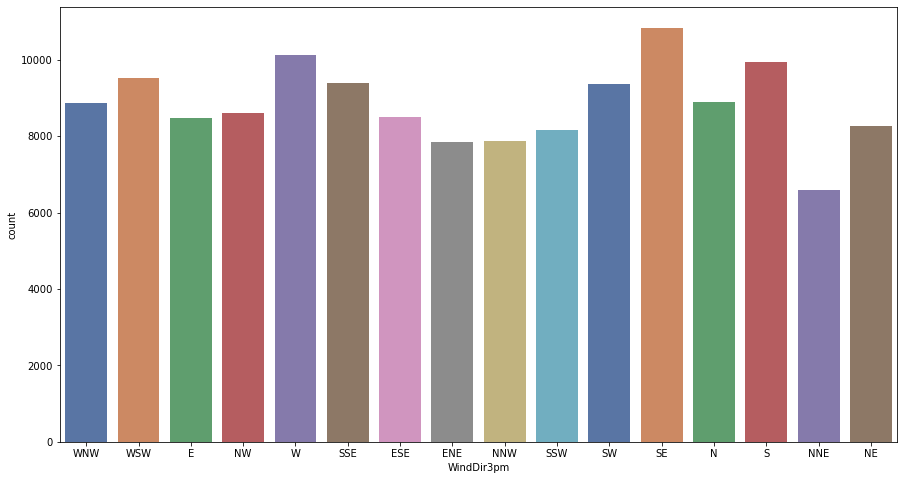

In [42]:
plt.figure(figsize=(15,8))
sns.countplot(data["WindDir3pm"],palette="deep")


In [43]:
data["WindDir3pm"]=data["WindDir3pm"].fillna(method="ffill")

In [44]:
data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [45]:
data["Humidity9am"].nunique()

101

<AxesSubplot:xlabel='Humidity9am', ylabel='count'>

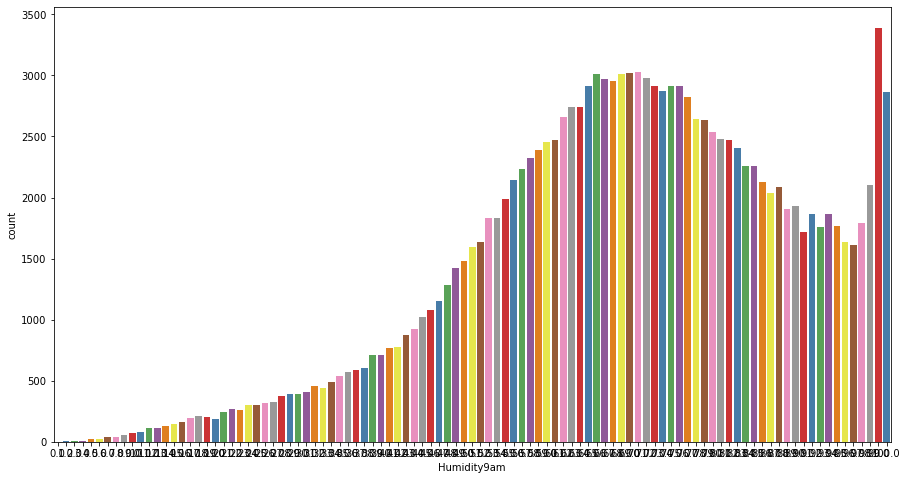

In [46]:
plt.figure(figsize=(15,8))
sns.countplot(data["Humidity9am"],palette="Set1")

In [47]:
data["Humidity9am"]=data["Humidity9am"].fillna(value=70.000000)

In [48]:
data["Humidity3pm"]=data["Humidity3pm"].fillna(value=52.000000)

In [49]:
data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      15065
Pressure3pm      15028
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [50]:
data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      15065
Pressure3pm      15028
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

<AxesSubplot:>

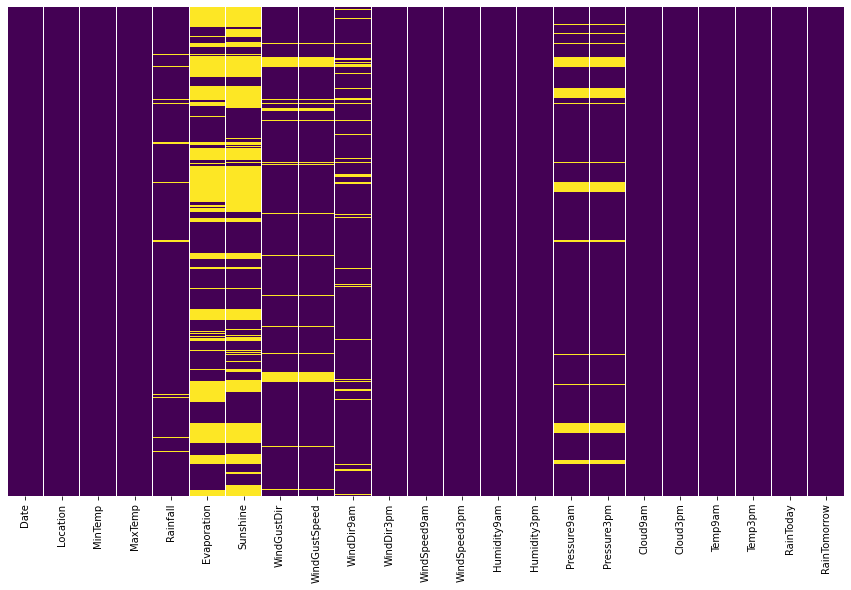

In [51]:
plt.figure(figsize=(15,9))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [52]:
data["Evaporation"]=data["Evaporation"].fillna(value=5.4)

In [53]:
data["Rainfall"]=data["Rainfall"].fillna(value=0)

In [54]:
data["Sunshine"]=data["Sunshine"].fillna(value=	7.611178)

In [55]:
data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      15065
Pressure3pm      15028
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [56]:
data.dropna(subset=['WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm'],inplace = True)

In [57]:
data.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am      9786
Pressure3pm      9824
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

In [58]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [59]:
data["RainToday"].value_counts()

No     99325
Yes    28194
Name: RainToday, dtype: int64

In [60]:
data["RainTomorrow"].value_counts()

No     99401
Yes    28118
Name: RainTomorrow, dtype: int64

In [61]:
data["Pressure9am"]=data["Pressure9am"].fillna(value=data["Pressure9am"].mean())

In [62]:
data["Pressure3pm"]=data["Pressure9am"].fillna(value=data["Pressure3pm"].mean())

In [63]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          5.4  7.611178   
1  2008-12-02   Albury      7.4     25.1       0.0          5.4  7.611178   
2  2008-12-03   Albury     12.9     25.7       0.0          5.4  7.611178   
3  2008-12-04   Albury      9.2     28.0       0.0          5.4  7.611178   
4  2008-12-05   Albury     17.5     32.3       1.0          5.4  7.611178   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.7       8.0       5.0     16.9     21.8         No   
1       1010.6       1010.6       5.0       5.0     17.2     24.3         No   
2       1007.6       1007.6       5.0       2.0     21.0     23.2         No   
3       1017.6       1017.6       5.0       5.0     18.1     26.5         No   
4       1010.8       1010.8       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

<AxesSubplot:>

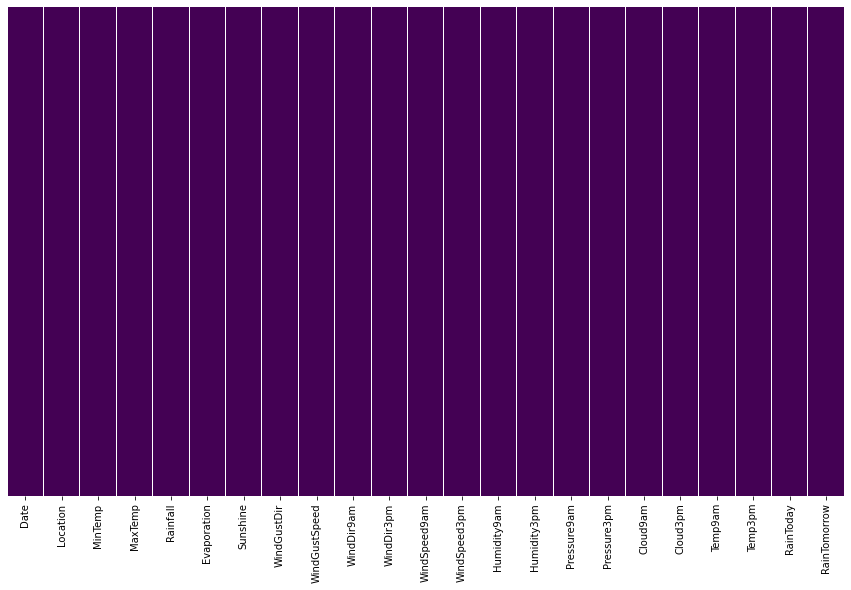

In [64]:
plt.figure(figsize=(15,9))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [65]:
data.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.738382  0.099159     0.362911  0.057781   
MaxTemp        0.738382  1.000000 -0.078986     0.449709  0.337191   
Rainfall       0.099159 -0.078986  1.000000    -0.044444 -0.176062   
Evaporation    0.362911  0.449709 -0.044444     1.000000  0.291598   
Sunshine       0.057781  0.337191 -0.176062     0.291598  1.000000   
WindGustSpeed  0.143293  0.040563  0.128911     0.142160 -0.034305   
WindSpeed9am   0.138177 -0.013513  0.083461     0.132966 -0.005045   
WindSpeed3pm   0.155889  0.029216  0.058384     0.084511  0.027090   
Humidity9am   -0.216814 -0.504463  0.234890    -0.383385 -0.358616   
Humidity3pm   -0.001345 -0.507462  0.256054    -0.295431 -0.451918   
Pressure9am   -0.414679 -0.297341 -0.163020    -0.206800  0.038780   
Pressure3pm   -0.414679 -0.297341 -0.163020    -0.206800  0.038780   
Cloud9am       0.035410 -0.240385  0.166638    -0.167483 -0.540548   
Cloud3pm      -0.005580 -0.226653  0.142172    -0.157628 -0.557220   
Temp9am        0.896248  0.887754  0.004338     0.425004  0.217704   
Temp3pm        0.704785  0.972988 -0.082636     0.435192  0.355137   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.143293      0.138177      0.155889    -0.216814   
MaxTemp             0.040563     -0.013513      0.029216    -0.504463   
Rainfall            0.128911      0.083461      0.058384     0.234890   
Evaporation         0.142160      0.132966      0.084511    -0.383385   
Sunshine           -0.034305     -0.005045      0.027090    -0.358616   
WindGustSpeed       1.000000      0.593611      0.675304    -0.179032   
WindSpeed9am        0.593611      1.000000      0.504356    -0.220522   
WindSpeed3pm        0.675304      0.504356      1.000000    -0.106015   
Humidity9am        -0.179032     -0.220522     -0.106015     1.000000   
Humidity3pm        -0.014966     -0.015841      0.036724     0.677754   
Pressure9am        -0.425099     -0.194340     -0.271675     0.110132   
Pressure3pm        -0.425099     -0.194340     -0.271675     0.110132   
Cloud9am            0.058487      0.010987      0.040904     0.366076   
Cloud3pm            0.084143      0.034296      0.019410     0.285979   
Temp9am             0.110860      0.082364      0.136449    -0.461575   
Temp3pm             0.006766     -0.022009      0.008349    -0.498785   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp          -0.001345    -0.414679    -0.414679  0.035410 -0.005580   
MaxTemp          -0.507462    -0.297341    -0.297341 -0.240385 -0.226653   
Rainfall          0.256054    -0.163020    -0.163020  0.166638  0.142172   
Evaporation      -0.295431    -0.206800    -0.206800 -0.167483 -0.157628   
Sunshine         -0.451918     0.038780     0.038780 -0.540548 -0.557220   
WindGustSpeed    -0.014966    -0.425099    -0.425099  0.058487  0.084143   
WindSpeed9am     -0.015841    -0.194340    -0.194340  0.010987  0.034296   
WindSpeed3pm      0.036724    -0.271675    -0.271675  0.040904  0.019410   
Humidity9am       0.677754     0.110132     0.110132  0.366076  0.285979   
Humidity3pm       1.000000    -0.033058    -0.033058  0.406397  0.409860   
Pressure9am      -0.033058     1.000000     1.000000 -0.105542 -0.113311   
Pressure3pm      -0.033058     1.000000     1.000000 -0.105542 -0.113311   
Cloud9am          0.406397    -0.105542    -0.105542  1.000000  0.569146   
Cloud3pm          0.409860    -0.113311    -0.113311  0.569146  1.000000   
Temp9am          -0.228398    -0.383203    -0.383203 -0.132838 -0.119015   
Temp3pm          -0.561210    -0.254002    -0.254002 -0.248858 -0.260914   

                Temp9am   Temp3pm  
MinTemp        0.896248  0.704785  
MaxTemp        0.887754  0.972988  
Rainfall       0.004338 -0.082636  
Evaporation    0.425004  0.435192  
Sunshine       0.217704  0.355137  
WindGustSpeed  0.110860  0.006766  
WindSpeed9am   0.082364 -0.022009  
Wi

In [66]:
data["Date"].tail()

145454    2017-06-20
145455    2017-06-21
145456    2017-06-22
145457    2017-06-23
145458    2017-06-24
Name: Date, dtype: object

In [67]:
data = pd.get_dummies(columns=['RainToday','RainTomorrow'],data = data,drop_first = True)

<AxesSubplot:xlabel='RainTomorrow_Yes', ylabel='count'>

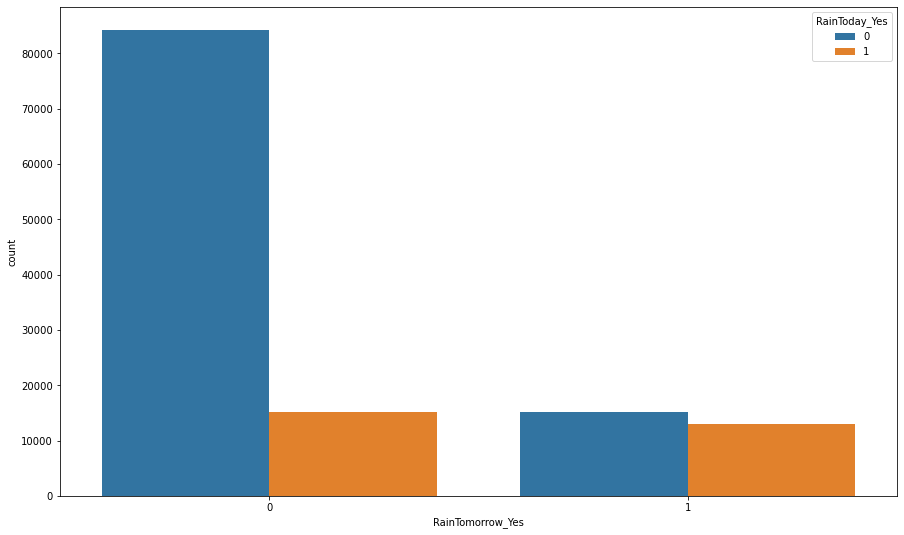

In [68]:
plt.figure(figsize=(15,9))
sns.countplot(x='RainTomorrow_Yes',data=data,hue='RainToday_Yes')

In [69]:
data.groupby("Location").sum().sort_values(by="RainToday_Yes",ascending=False).head()

MinTemp  MaxTemp  Rainfall  Evaporation      Sunshine  \
Location                                                               
Portland       27999.3  52516.9    7385.6      10792.4  19430.928896   
Cairns         63222.8  88026.0   16555.2      18344.3  22619.286592   
NorfolkIsland  49526.4  64077.7    9087.8      14102.6  20878.105938   
MountGambier   25941.6  57979.5    6113.2      10835.1  19472.682980   
Walpole        31990.1  54942.6    7419.2      14396.4  20291.400548   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Location                                                                
Portland            123243.0       48510.0       60909.0     227760.0   
Cairns              113673.0       48026.0       65524.0     208023.0   
NorfolkIsland       125429.0       59646.0       64437.0     207551.0   
MountGambier        126042.0       52243.0       65858.0     218898.0   
Walpole             109314.0       40199.0       47555.0     200205.0   

               Humidity3pm   Pressure9am   Pressure3pm  Cloud9am  Cloud3pm  \
Location                                                                     
Portland          191587.0  2.958154e+06  2.958154e+06   17886.0   17144.0   
Cairns            183655.0  3.020279e+06  3.020279e+06   13646.0   13333.0   
NorfolkIsland     199002.0  2.985682e+06  2.985682e+06   14721.0   14222.0   
MountGambier      166537.0  2.964912e+06  2.964912e+06   16062.0   15922.0   
Walpole           176831.0  2.712435e+06  2.712435e+06   13330.0   13330.0   

               Temp9am  Temp3pm  RainToday_Yes  RainTomorrow_Yes  
Location                                                          
Portland       38585.5  48068.4         1066.0            1069.0  
Cairns         76911.7  83104.9          925.0             928.0  
NorfolkIsland  58072.6  60088.3          898.0             897.0  
MountGambier   40403.1  53161.6          890.0             887.0  
Walpole        43093.8  49780.1          848.0             876.0

In [70]:
data[data["RainToday_Yes"]==1]

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
9       2008-12-10   Albury     13.1     30.1       1.4          5.4   
11      2008-12-12   Albury     15.9     21.7       2.2          5.4   
12      2008-12-13   Albury     15.9     18.6      15.6          5.4   
13      2008-12-14   Albury     12.6     21.0       3.6          5.4   
17      2008-12-18   Albury     13.5     22.9      16.8          5.4   
...            ...      ...      ...      ...       ...          ...   
145325  2017-02-11    Uluru     22.2     39.4       6.2          5.4   
145391  2017-04-18    Uluru     15.2     21.5       6.8          5.4   
145392  2017-04-19    Uluru     17.7     26.9      12.6          5.4   
145393  2017-04-20    Uluru     18.6     28.6      34.6          5.4   
145394  2017-04-21    Uluru     18.1     29.6       3.8          5.4   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
9       7.611178           W           28.0          S  ...        58.0   
11      7.611178         NNE           31.0         NE  ...        89.0   
12      7.611178           W           61.0        NNW  ...        76.0   
13      7.611178          SW           44.0          W  ...        65.0   
17      7.611178           W           63.0          N  ...        80.0   
...          ...         ...            ...        ...  ...         ...   
145325  7.611178           S           30.0          S  ...        56.0   
145391  7.611178         ENE           30.0         NE  ...        65.0   
145392  7.611178           S           35.0          E  ...        93.0   
145393  7.611178           E           46.0          E  ...       100.0   
145394  7.611178         SSE           35.0        SSE  ...        90.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
9              27.0       1007.0       1007.0       5.0       5.0     20.1   
11             91.0       1010.5       1010.5       8.0       8.0     15.9   
12             93.0        994.3        994.3       8.0       8.0     17.4   
13             43.0       1001.2       1001.2       5.0       7.0     15.8   
17             65.0       1005.8       1005.8       8.0       1.0     18.0   
...             ...          ...          ...       ...       ...      ...   
145325         25.0       1008.4       1008.4       5.0       4.0     28.6   
145391         65.0       1016.9       1016.9       3.0       8.0     19.0   
145392         59.0       1018.1       1018.1       7.0       8.0     19.0   
145393         56.0       1020.0       1020.0       8.0       5.0     19.8   
145394         46.0       1017.7       1017.7       1.0       8.0     20.3   

        Temp3pm  RainToday_Yes  RainTomorrow_Yes  
9          28.2              1                 0  
11         17.0              1                 1  
12         15.8              1                 1  
13         19.8              1                 0  
17         21.5              1                 1  
...         ...            ...               ...  
145325     38.7              1                 0  
145391     21.2              1                 1  
145392     26.0              1                 1  
145393     26.9              1                 1  
145394     28.0              1                 0  

[28194 rows x 23 columns]

In [71]:
data["month_num"]=data["Date"].apply(lambda x: x.split('-')[-2])

In [72]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          5.4  7.611178   
1  2008-12-02   Albury      7.4     25.1       0.0          5.4  7.611178   
2  2008-12-03   Albury     12.9     25.7       0.0          5.4  7.611178   
3  2008-12-04   Albury      9.2     28.0       0.0          5.4  7.611178   
4  2008-12-05   Albury     17.5     32.3       1.0          5.4  7.611178   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday_Yes  \
0       1007.7       8.0       5.0     16.9     21.8              0   
1       1010.6       5.0       5.0     17.2     24.3              0   
2       1007.6       5.0       2.0     21.0     23.2              0   
3       1017.6       5.0       5.0     18.1     26.5              0   
4       1010.8       7.0       8.0     17.8     29.7              0   

   RainTomorrow_Yes  month_num  
0                 0         12  
1                 0         12  
2                 0         12  
3                 0         12  
4                 0         12  

[5 rows x 24 columns]

In [73]:
data.groupby("month_num").sum().sort_values(by="RainToday_Yes",ascending=False).head()

MinTemp   MaxTemp  Rainfall  Evaporation      Sunshine  \
month_num                                                            
06          86044.5  183739.8   29991.0      39735.4  69343.421126   
07          74091.8  170370.4   22595.9      38130.9  68082.097388   
08          80241.6  190142.4   21024.7      45391.5  76299.470134   
03         184633.0  311121.6   32899.7      68555.7  88178.758532   
05         111527.4  225754.0   22922.1      47105.0  77985.190520   

           WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
month_num                                                           
06              388899.0      146145.0      176479.0     821991.0   
07              396606.0      146668.0      184296.0     768502.0   
08              426762.0      156495.0      202641.0     731721.0   
03              462790.0      167783.0      217555.0     804572.0   
05              414335.0      156228.0      191795.0     821167.0   

           Humidity3pm   Pressure9am   Pressure3pm  Cloud9am  Cloud3pm  \
month_num                                                                
06            634820.0  1.074941e+07  1.074941e+07   51075.0   52017.0   
07            584507.0  1.030148e+07  1.030148e+07   47096.0   48648.0   
08            548315.0  1.058060e+07  1.058060e+07   46161.0   48125.0   
03            576570.0  1.172820e+07  1.172820e+07   53849.0   54277.0   
05            614966.0  1.143664e+07  1.143664e+07   52340.0   54221.0   

            Temp9am   Temp3pm  RainToday_Yes  RainTomorrow_Yes  
month_num                                                       
06         125637.7  172064.3         2784.0            2785.0  
07         113272.4  159190.0         2764.0            2742.0  
08         131016.6  176757.8         2639.0            2616.0  
03         230717.7  292462.1         2513.0            2441.0  
05         161722.0  211894.0         2501.0            2524.0

In [74]:
data.groupby("month_num").sum().sort_values(by="RainToday_Yes",ascending=True).head()

MinTemp   MaxTemp  Rainfall  Evaporation      Sunshine  \
month_num                                                            
02         167950.4  278993.2   29804.7      65110.4  78802.915530   
10         125818.1  257204.6   16937.6      65521.0  88575.579424   
12         158976.0  279175.5   24362.5      70197.8  84386.888536   
04         130609.0  238818.7   23184.8      49772.8  74051.380710   
11         152611.8  281122.3   23154.3      71340.6  87954.075812   

           WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
month_num                                                           
02              401530.0      145125.0      187008.0     636210.0   
10              467169.0      174841.0      225370.0     674847.0   
12              435067.0      158472.0      204842.0     614678.0   
04              373214.0      140328.0      176768.0     702001.0   
11              457094.0      168027.0      216134.0     656339.0   

           Humidity3pm   Pressure9am   Pressure3pm  Cloud9am  Cloud3pm  \
month_num                                                                
02            463493.0  9.756088e+06  9.756088e+06   44693.0   44490.0   
10            510819.0  1.108558e+07  1.108558e+07   48802.0   49196.0   
12            469781.0  1.021309e+07  1.021309e+07   48049.0   47484.0   
04            521352.0  1.025785e+07  1.025785e+07   46965.0   48502.0   
11            505539.0  1.087143e+07  1.087143e+07   50929.0   50580.0   

            Temp9am   Temp3pm  RainToday_Yes  RainTomorrow_Yes  
month_num                                                       
02         209837.8  261337.4         1924.0            1937.0  
10         188498.3  238136.3         2075.0            2049.0  
12         214049.4  258912.8         2092.0            2052.0  
04         179582.3  224463.5         2164.0            2164.0  
11         213563.4  260256.6         2191.0            2201.0

<AxesSubplot:>

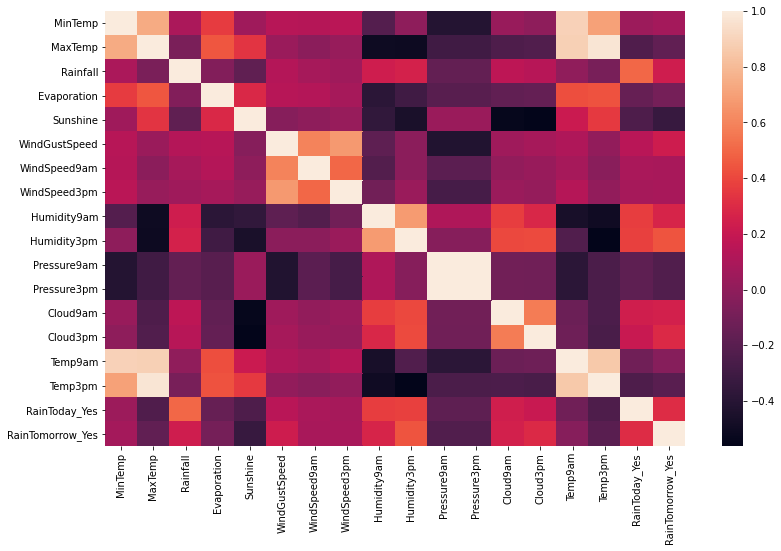

In [75]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr())

In [76]:
data.groupby("RainToday_Yes").corr().tail()

MinTemp   MaxTemp  Rainfall  Evaporation  \
RainToday_Yes                                                               
1             Cloud9am          0.119965 -0.050324  0.130753    -0.039659   
              Cloud3pm          0.046391 -0.102046  0.101678    -0.058334   
              Temp9am           0.943050  0.925043  0.163130     0.267411   
              Temp3pm           0.845563  0.966940  0.114944     0.271018   
              RainTomorrow_Yes  0.092065 -0.074624  0.161264    -0.019565   

                                Sunshine  WindGustSpeed  WindSpeed9am  \
RainToday_Yes                                                           
1             Cloud9am         -0.463687       0.019747      0.030954   
              Cloud3pm         -0.485205       0.045552      0.061489   
              Temp9am           0.035515      -0.082505     -0.046953   
              Temp3pm           0.129269      -0.162487     -0.137208   
              RainTomorrow_Yes -0.281512       0.216380      0.086732   

                                WindSpeed3pm  Humidity9am  Humidity3pm  \
RainToday_Yes                                                            
1             Cloud9am              0.023369     0.361744     0.325945   
              Cloud3pm             -0.000393     0.235898     0.410332   
              Temp9am               0.005881    -0.228854    -0.079700   
              Temp3pm              -0.051009    -0.211785    -0.321339   
              RainTomorrow_Yes      0.069059     0.277677     0.482874   

                                Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
RainToday_Yes                                                                  
1             Cloud9am            -0.087722    -0.087722  1.000000  0.457707   
              Cloud3pm            -0.089554    -0.089554  0.457707  1.000000   
              Temp9am             -0.198438    -0.198438  0.005487 -0.020803   
              Temp3pm             -0.142033    -0.142033 -0.053719 -0.132017   
              RainTomorrow_Yes    -0.192358    -0.192358  0.215443  0.263658   

                                 Temp9am   Temp3pm  RainTomorrow_Yes  
RainToday_Yes                                                         
1             Cloud9am          0.005487 -0.053719          0.215443  
              Cloud3pm         -0.020803 -0.132017          0.263658  
              Temp9am           1.000000  0.905423          0.027874  
              Temp3pm           0.905423  1.000000         -0.104899  
              RainTomorrow_Yes  0.027874 -0.104899          1.000000

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Temp9am'>

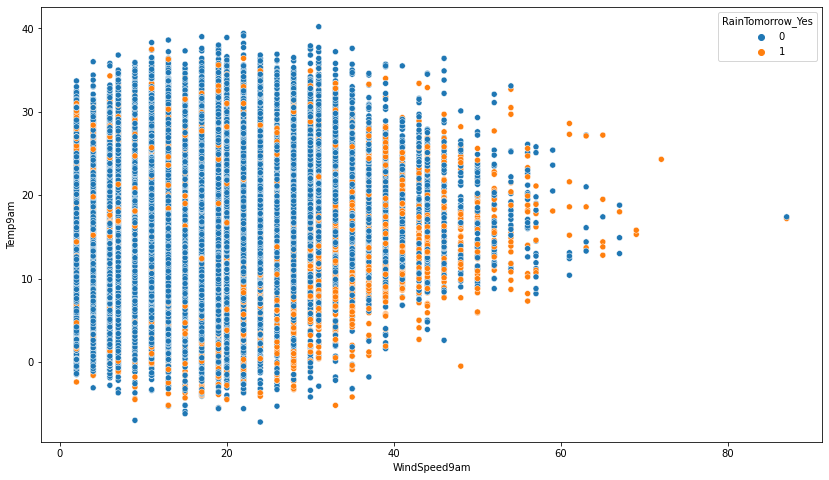

In [77]:

plt.figure(figsize=(14,8))
sns.scatterplot(x='WindSpeed9am',y='Temp9am',data=data,hue='RainTomorrow_Yes',cmap="viridis")

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Temp9am'>

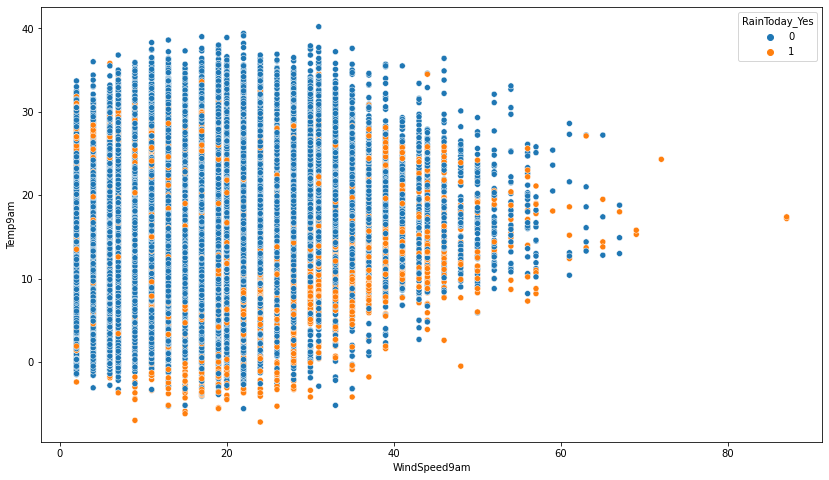

In [78]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='WindSpeed9am',y='Temp9am',data=data,hue='RainToday_Yes')

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

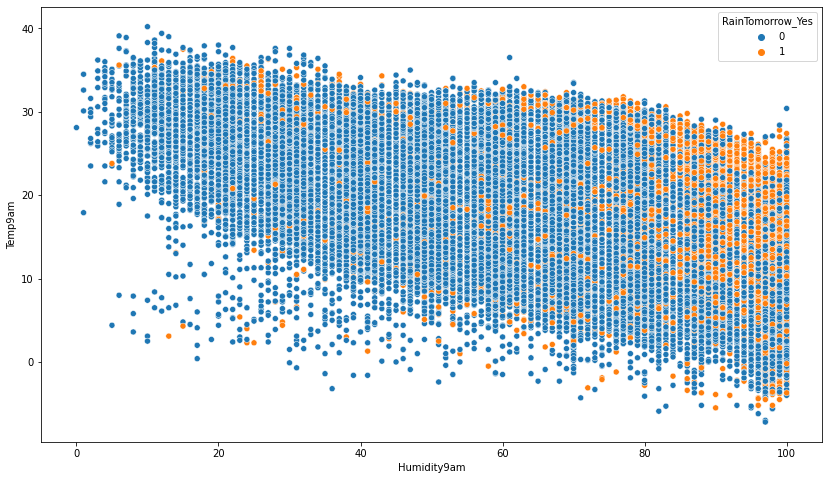

In [79]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Humidity9am',y='Temp9am',data=data,hue='RainTomorrow_Yes')

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
#CONVERTING THE CATEGORICAL DATA USING LABELENCODER

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(data['WindGustDir'])
label

array([13, 14, 15, ...,  6,  3,  9])

In [83]:
data.WindGustDir = label
label_1 = le.fit_transform(data['WindDir9am'])
data.WindDir9am = label_1
label_2 = le.fit_transform(data['WindDir3pm'])
data.WindDir3pm = label_2


data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          5.4  7.611178   
1  2008-12-02   Albury      7.4     25.1       0.0          5.4  7.611178   
2  2008-12-03   Albury     12.9     25.7       0.0          5.4  7.611178   
3  2008-12-04   Albury      9.2     28.0       0.0          5.4  7.611178   
4  2008-12-05   Albury     17.5     32.3       1.0          5.4  7.611178   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity3pm  Pressure9am  \
0           13           44.0          13  ...         22.0       1007.7   
1           14           44.0           6  ...         25.0       1010.6   
2           15           46.0          13  ...         30.0       1007.6   
3            4           24.0           9  ...         16.0       1017.6   
4           13           41.0           1  ...         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday_Yes  \
0       1007.7       8.0       5.0     16.9     21.8              0   
1       1010.6       5.0       5.0     17.2     24.3              0   
2       1007.6       5.0       2.0     21.0     23.2              0   
3       1017.6       5.0       5.0     18.1     26.5              0   
4       1010.8       7.0       8.0     17.8     29.7              0   

   RainTomorrow_Yes  month_num  
0                 0         12  
1                 0         12  
2                 0         12  
3                 0         12  
4                 0         12  

[5 rows x 24 columns]

In [84]:
data["Location_n"]=le.fit_transform(data['Location'])

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127519 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              127519 non-null  object 
 1   Location          127519 non-null  object 
 2   MinTemp           127519 non-null  float64
 3   MaxTemp           127519 non-null  float64
 4   Rainfall          127519 non-null  float64
 5   Evaporation       127519 non-null  float64
 6   Sunshine          127519 non-null  float64
 7   WindGustDir       127519 non-null  int64  
 8   WindGustSpeed     127519 non-null  float64
 9   WindDir9am        127519 non-null  int64  
 10  WindDir3pm        127519 non-null  int64  
 11  WindSpeed9am      127519 non-null  float64
 12  WindSpeed3pm      127519 non-null  float64
 13  Humidity9am       127519 non-null  float64
 14  Humidity3pm       127519 non-null  float64
 15  Pressure9am       127519 non-null  float64
 16  Pressure3pm       12

In [86]:
data["month_num"]=data["month_num"].astype("int")

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127519 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              127519 non-null  object 
 1   Location          127519 non-null  object 
 2   MinTemp           127519 non-null  float64
 3   MaxTemp           127519 non-null  float64
 4   Rainfall          127519 non-null  float64
 5   Evaporation       127519 non-null  float64
 6   Sunshine          127519 non-null  float64
 7   WindGustDir       127519 non-null  int64  
 8   WindGustSpeed     127519 non-null  float64
 9   WindDir9am        127519 non-null  int64  
 10  WindDir3pm        127519 non-null  int64  
 11  WindSpeed9am      127519 non-null  float64
 12  WindSpeed3pm      127519 non-null  float64
 13  Humidity9am       127519 non-null  float64
 14  Humidity3pm       127519 non-null  float64
 15  Pressure9am       127519 non-null  float64
 16  Pressure3pm       12

In [88]:
#FEATURES FOR TRAINING AND TESTING DATA

In [89]:
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday_Yes', 'month_num','Location_n']]
y = data['RainTomorrow_Yes']

In [90]:
# USING stochastic gradient descent (SGD) FOR PREDICTION OF RAINFALL

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle = True)
from sklearn.linear_model import SGDClassifier
sgd_cal = SGDClassifier()
sgd_cal.fit(X_train,y_train)

SGDClassifier()

In [92]:
predictions = sgd_cal.predict(X_test)

In [93]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     29748
           1       0.61      0.63      0.62      8508

    accuracy                           0.83     38256
   macro avg       0.75      0.76      0.76     38256
weighted avg       0.83      0.83      0.83     38256



In [95]:
print(confusion_matrix(y_test,predictions))

[[26367  3381]
 [ 3157  5351]]


In [96]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(sgd_cal,X_train,y_train,cv=10,scoring='accuracy')


In [97]:
score

array([0.77405623, 0.83611516, 0.82233673, 0.84640376, 0.50885055,
       0.82444544, 0.83766525, 0.83520054, 0.80147883, 0.80752857])

In [98]:
#USING DECISION TREE FOR PREDICTION OF RAINFALL

In [99]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [100]:
predictions2 = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     29748
           1       0.52      0.53      0.53      8508

    accuracy                           0.79     38256
   macro avg       0.69      0.70      0.69     38256
weighted avg       0.79      0.79      0.79     38256



In [101]:
accuracy=accuracy_score(y_test,predictions2)
print("Accuracy : %.2f%%" % (accuracy*100.0))

Accuracy : 78.74%


In [102]:
#USING RANDOM FOREST FOR PREDICTION OF RAINFALL

In [103]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [104]:

rfc_pred = rfc.predict(X_test)

In [105]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     29748
           1       0.77      0.50      0.61      8508

    accuracy                           0.86     38256
   macro avg       0.82      0.73      0.76     38256
weighted avg       0.85      0.86      0.84     38256



In [106]:
accuracy=accuracy_score(y_test,rfc_pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

Accuracy : 85.58%


In [107]:
print(confusion_matrix(y_test,rfc_pred))

[[28457  1291]
 [ 4226  4282]]


In [108]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

features = list(data.columns[:-3])
features

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday_Yes']

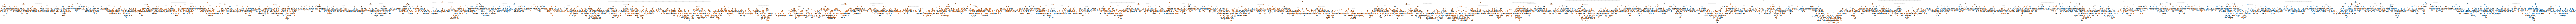

In [109]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [110]:
#USING XGBOOST CLASSIFIER  FOR PREDICTION OF RAINFALL

In [111]:
from xgboost import XGBClassifier

In [112]:
xg=XGBClassifier()

In [113]:
xg.fit(X_train,y_train)

[05:40:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
rf = xg.predict(X_test)

In [115]:
print(classification_report(y_test,rf))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     29748
           1       0.74      0.54      0.63      8508

    accuracy                           0.86     38256
   macro avg       0.81      0.74      0.77     38256
weighted avg       0.85      0.86      0.85     38256



In [116]:
from sklearn.metrics import accuracy_score

In [117]:
accuracy=accuracy_score(y_test,rf)
print("Accuracy : %.2f%%" % (accuracy*100.0))

Accuracy : 85.60%


In [118]:
#REMOVING THE OUTLIERS

In [119]:
def detect_outliers(data,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(data[c],25)
        #3rd quartile
        Q3 = np.percentile(data[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1.5
        #Detect outlier and their indices
        outlier_list_col = data[(data[c]<Q1 - outlier_step) | (data[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [120]:
s=[]
s=data.loc[detect_outliers(data,['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday_Yes', 'month_num','Location_n'])]

In [121]:
s.shape

(16374, 25)

In [122]:
data = data.drop(detect_outliers(data,['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday_Yes', 'month_num','Location_n']),axis=0).reset_index(drop = True)
